## Computation on Arrays: Braodcasting

NumPy's universal functions can be used to vectorize operations and thereby remove slow python loops. Another means of vectoreizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (+, -, *, etc.) on arrays of different sizes.

### Introducing Broadcasting

Recall that for arrys of the same size, binary operations are performed on an element-by-element basis:

In [2]:
import numpy as np

In [4]:
a = np.array([0, 1, 2])

b = np.array([5, 5, 5])

a+b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes. for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an arra

In [5]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy’s broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [6]:
m = np.ones((3, 3))

m

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
m + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

> Here one-dimensional array a is stretched, or broadcast, across the second dimension in order to match the shape of m.

In [9]:
# Example

a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

a, b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]))

In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we’ve stretched both a and b to match a common shape, and the result is a two dimensional array!

![NumPy Broadcasting](../../Pictures/NumPy%20broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

### Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

+ Rule 1:

        If the two arrays differ in their number of dimensions, the shape of the one with dever dimensions is padded whith ones on its leading (left) side.

+ Rule 2:

        If the shape of the two arrays does not match in any dimensions, the array with shape equal to 1 in that dimension is tretched to match the other shape.

+ Rule 3:

        If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Broadcasting example 01

Adding a 2D array to a 1D array:

In [15]:
_ = np.ones((2, 3))

__ = np.arange(3)

_.shape, __.shape

((2, 3), (3,))

According to the 1st rule, fewer dimensions array is pad with the left one...

In [16]:
_ + __

array([[1., 2., 3.],
       [1., 2., 3.]])

### Braodcasting example 2

Both arrys need to be broadcast:

In [19]:
a = np.arange(3). reshape(3, 1)

b = np.arange(3)

a.shape, b. shape, a, b

((3, 1),
 (3,),
 array([[0],
        [1],
        [2]]),
 array([0, 1, 2]))

Rule 1 says we must pad the shape of b with ones:

a.shape -> (3, 1)
b.shape -> (1, 3)

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

a.shape -> (3, 3)
b.shape -> (3, 3)

In [18]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Braodcasting example 3

Two arrays are not compatible:

In [20]:
a = np.ones((3, 2))

b = np.arange(3)

This is just a slightly different situation than in the first example: the matrix a is transposed. How does this affect the calculation? The shapes of the arrays are:

a.shape = (3, 2)
b.shape = (3,)

Again, rule 1 tells us that we must pad the shape of b with ones:

a.shape -> (3, 2)
b.shape -> (1, 3)

By rule 2, the first dimension of a is stretched to match that of a:

a.shape -> (3, 2)
b.shape -> (3, 3)

In [21]:
a + b 

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

you could imagine making b and a compatible by, say, padding b’s shape with ones on the right rather than the left. But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.

In [23]:
b[:, np.newaxis].shape

(3, 1)

In [27]:
a + b[: , np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

### Braodcasting in practice.

In [33]:
X = np.arange(30).reshape(10, 3)

# using mean aggregate to compute the mean

Xmean = X.mean(axis=0)

Xmean

array([13.5, 14.5, 15.5])

And now we can center the X array by subtracting the mean (this is a broadcasting operations):

In [34]:
X_centered = X - Xmean

X_centered

array([[-13.5, -13.5, -13.5],
       [-10.5, -10.5, -10.5],
       [ -7.5,  -7.5,  -7.5],
       [ -4.5,  -4.5,  -4.5],
       [ -1.5,  -1.5,  -1.5],
       [  1.5,   1.5,   1.5],
       [  4.5,   4.5,   4.5],
       [  7.5,   7.5,   7.5],
       [ 10.5,  10.5,  10.5],
       [ 13.5,  13.5,  13.5]])

To check if correct.

In [35]:
X_centered.mean(0)

array([0., 0., 0.])

#### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function z = f(x, y), broadcasting can be used to compute the function across the grid:

In [38]:
# x and y have 50 steps form 0 to 50

x = np.linspace(0, 5, 50)

y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

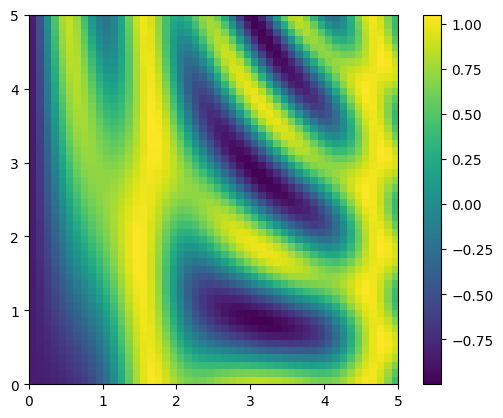

In [46]:
%matplotlib inline

import matplotlib.pylab as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')

plt.colorbar()